In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import glob
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load and concatenate datasets
file_paths = glob.glob("*.csv")  # Adjust path as needed

data_frames = []
for file_path in file_paths:
    df_temp = pd.read_csv(file_path)
    df_temp['Reboot'] = 'After' if 'after' in file_path else 'Before'
    #df_temp['Category'] = file_path.split('/')[-1].split('_')[0]  # extract category from filename
    data_frames.append(df_temp)

# Ensure column alignment by names
df = pd.concat(data_frames, ignore_index=True, sort=False).fillna(0)
df

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_SwapPssDirty,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,...,Logcat_info,Logcat_warning,Logcat_error,Logcat_verbose,Logcat_total,Process_total,Hash,Category,Family,Reboot
0,46430,5156,11304,34336,86444,5176,0,15429,11470,3958,...,3237,1742,959,124,9023,193,7afa2e71595c8b5b948121b43f0f8ac31685c5dd449a79...,Adware,mobidash,After
1,35437,3064,12396,25632,91220,3080,0,13074,10631,2442,...,546,111,1077,1149,5073,191,cfb3d3f7d2f3b0a4570b4eadfcb6c5d2f4e63a88a78bf7...,Adware,pandaad,After
2,56846,2340,10768,47296,95940,2592,0,16154,11361,4792,...,5479,1712,610,145,10172,191,3c440a80f79ffa306d5618a2fdc2e60c2d216032a78883...,Adware,dowgin,After
3,30576,1152,12664,24312,78192,1164,0,7913,4720,3192,...,2517,9354,3688,117,17089,193,63dc50487352d6b8691f081fb763514284819d6b8ef730...,Adware,baiduprotect,After
4,148452,19332,10808,122364,87080,20104,0,44830,34063,10766,...,1588,1310,3309,1530,7847,195,6f05280449712ab1fb61083b489dd4714d912c1542faf2...,Adware,inmobi,After
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53434,61932,5044,10764,44552,88336,9688,0,31056,24708,6347,...,2023,2826,8736,1523,15593,186,77563fde29181439175fdeabd9595ddd8ee3f7b10b269e...,Zero_Day,SINGLETON:2f6fd38ca9d9c3c233e03e747ea9985b,Before
53435,86293,3756,10664,71892,76708,7400,0,23969,18170,5798,...,2492,2885,1000,3385,11268,186,fcfac8f4d7fc51e598d199e7d83d79b609466b003ff40c...,Zero_Day,SINGLETON:384e37a090401538378a3a92334e7d8b,Before
53436,47153,9100,12820,29128,83284,9104,0,8475,6708,1766,...,1343,4220,8106,1510,19173,185,1563b4f3fad77d434a1a58897f855df45780a11694998c...,Zero_Day,<unknown>,Before
53437,40351,252,10808,35696,74940,388,0,14311,11930,2380,...,1483,4302,1077,2351,10992,197,20359be5dd2ce82f859f33b627985f35f94381053401f8...,Zero_Day,SINGLETON:bcf17148abcc7e818d63ef0e29c885d7,Before


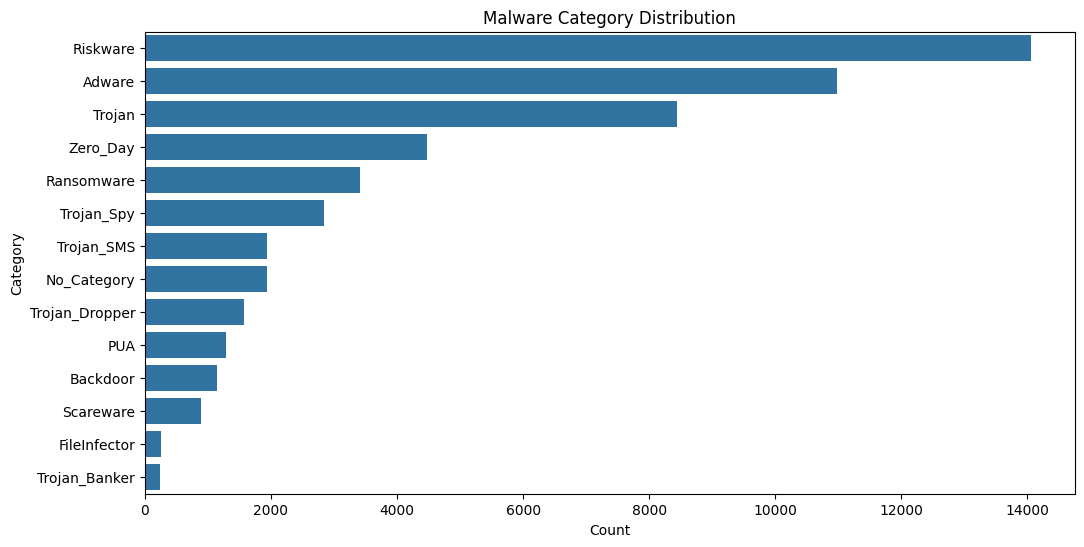

In [4]:
"""
Adware_Before: 5838
Adware_After: 5142
Backdoor_Before: 591
Backdoor_After: 546
FileInfector_Before: 129
FileInfector_After: 119
PUA_Before: 665
PUA_After: 625
No_Category_Before: 1048
No_Category_After: 884
Ransomware_Before: 1861
Ransomware_After: 1550
Riskware_Before: 7261
Riskware_After: 6792
Scareware_Before: 462
Scareware_After: 424
Trojan_Before: 4412
Trojan_After: 4025
Trojan_Banker_Before: 118
Trojan_Banker_After: 123
Trojan_Dropper_Before: 837
Trojan_Dropper_After: 733
Trojan_SMS_Before: 1028
Trojan_SMS_After: 911
Trojan_Spy_Before: 1801
Trojan_Spy_After: 1039
Zero_Day_Before: 2329
Zero_Day_After: 2146
"""

plt.figure(figsize=(12,6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Malware Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

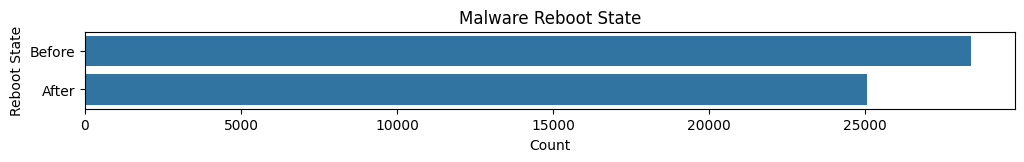

In [5]:
plt.figure(figsize=(12,1))
sns.countplot(y='Reboot', data=df, order=df['Reboot'].value_counts().index)
plt.title('Malware Reboot State')
plt.xlabel('Count')
plt.ylabel('Reboot State')
plt.show()

In [6]:
#Preparing data for Binary Classification (Before vs After)
df['BinaryReboot'] = df['Reboot'].map({'Before': 0, 'After': 1})
# Drop non-numeric columns and label columns
drop_cols = ['Category', 'Reboot', 'Hash', 'Family', 'BinaryReboot']
X = df.drop(columns=drop_cols, errors='ignore')
X = X.select_dtypes(include=['number'])
y = df['BinaryReboot']
X

,Memory_PssTotal,Memory_PssClean,Memory_SharedDirty,Memory_PrivateDirty,Memory_SharedClean,Memory_PrivateClean,Memory_SwapPssDirty,Memory_HeapSize,Memory_HeapAlloc,Memory_HeapFree,...,Network_TotalTransmittedPackets,Battery_wakelock,Battery_service,Logcat_debug,Logcat_info,Logcat_warning,Logcat_error,Logcat_verbose,Logcat_total,Process_total
0,46430,5156,11304,34336,86444,5176,0,15429,11470,3958,...,3551,3,0,2961,3237,1742,959,124,9023,193
1,35437,3064,12396,25632,91220,3080,0,13074,10631,2442,...,0,2,0,2190,546,111,1077,1149,5073,191
2,56846,2340,10768,47296,95940,2592,0,16154,11361,4792,...,71,7,1,2226,5479,1712,610,145,10172,191
3,30576,1152,12664,24312,78192,1164,0,7913,4720,3192,...,0,2,0,1413,2517,9354,3688,117,17089,193
4,148452,19332,10808,122364,87080,20104,0,44830,34063,10766,...,1938,2,0,110,1588,1310,3309,1530,7847,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53434,61932,5044,10764,44552,88336,9688,0,31056,24708,6347,...,0,4,0,485,2023,2826,8736,1523,15593,186
53435,86293,3756,10664,71892,76708,7400,0,23969,18170,5798,...,32,5,1,1506,2492,2885,1000,3385,11268,186
53436,47153,9100,12820,29128,83284,9104,0,8475,6708,1766,...,75,4,1,3994,1343,4220,8106,1510,19173,185
53437,40351,252,10808,35696,74940,388,0,14311,11930,2380,...,53,0,0,1779,1483,4302,1077,2351,10992,197


=== Logistic Regression ===
Time: 2.08s
              precision    recall  f1-score   support

      Before       0.91      0.88      0.90      5676
       After       0.89      0.91      0.90      5676

    accuracy                           0.90     11352
   macro avg       0.90      0.90      0.90     11352
weighted avg       0.90      0.90      0.90     11352



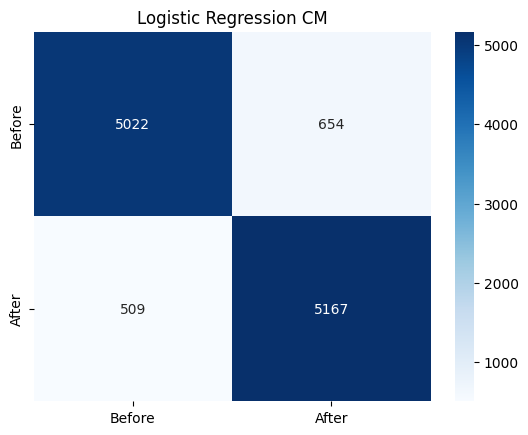

=== Random Forest ===
Time: 5.85s
              precision    recall  f1-score   support

      Before       1.00      0.99      0.99      5676
       After       0.99      1.00      0.99      5676

    accuracy                           0.99     11352
   macro avg       0.99      0.99      0.99     11352
weighted avg       0.99      0.99      0.99     11352



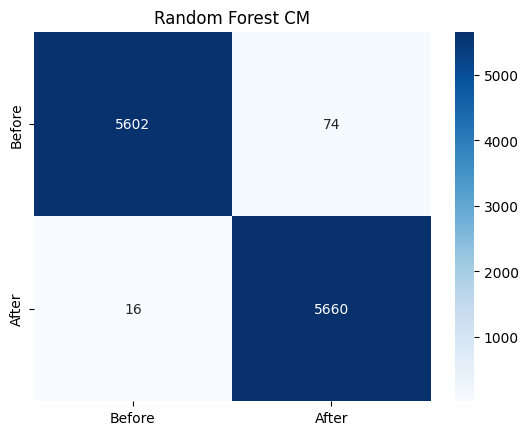

=== Decision Tree ===
Time: 9.76s
              precision    recall  f1-score   support

      Before       0.98      0.97      0.97      5676
       After       0.97      0.98      0.97      5676

    accuracy                           0.97     11352
   macro avg       0.97      0.97      0.97     11352
weighted avg       0.97      0.97      0.97     11352



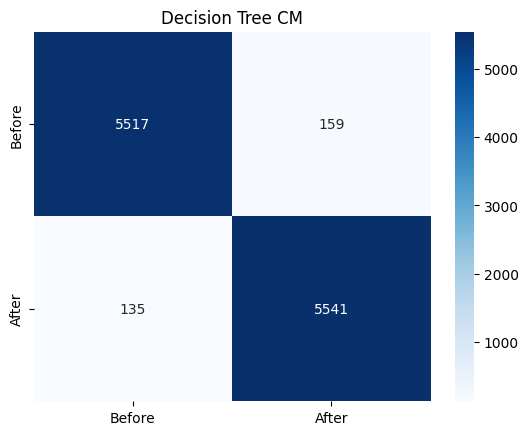

=== XGBoost ===
Time: 2.10s
              precision    recall  f1-score   support

      Before       1.00      1.00      1.00      5676
       After       1.00      1.00      1.00      5676

    accuracy                           1.00     11352
   macro avg       1.00      1.00      1.00     11352
weighted avg       1.00      1.00      1.00     11352



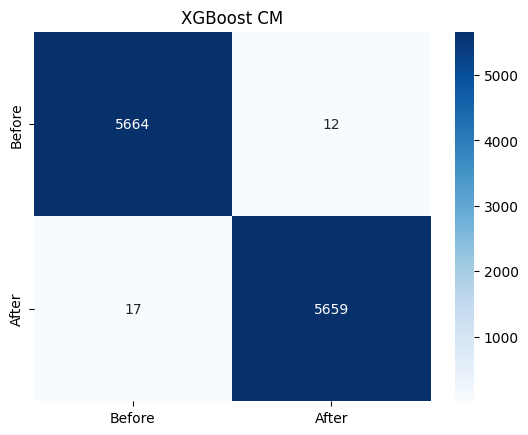

[LightGBM] [Info] Number of positive: 22704, number of negative: 22704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15369
[LightGBM] [Info] Number of data points in the train set: 45408, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
=== LightGBM ===
Time: 2.46s
              precision    recall  f1-score   support

      Before       1.00      1.00      1.00      5676
       After       1.00      1.00      1.00      5676

    accuracy                           1.00     11352
   macro avg       1.00      1.00      1.00     11352
weighted avg       1.00      1.00      1.00     11352



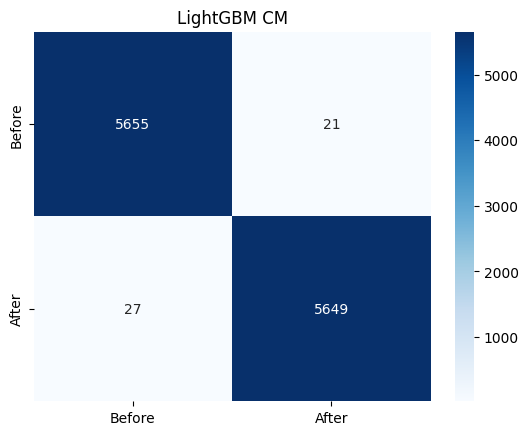

In [7]:
#Handling Class Imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_res)

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_res, test_size=0.2, stratify=y_res, random_state=42
)

#Defining Classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', n_jobs=-1, random_state=42),
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42)
}

#Single Train/Test Evaluation and plotting
def evaluate_holdout(models, X_tr, X_te, y_tr, y_te):
    for name, clf in models.items():
        t0 = time.time()
        clf.fit(X_tr, y_tr)
        preds = clf.predict(X_te)
        dt = time.time() - t0
        print(f"=== {name} ===")
        print(f"Time: {dt:.2f}s")
        print(classification_report(y_te, preds, target_names=['Before','After']))
        cm = confusion_matrix(y_te, preds)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Before','After'], yticklabels=['Before','After'])
        plt.title(f'{name} CM'); plt.show()

evaluate_holdout(models, X_train, X_test, y_train, y_test)

In [8]:
#5‑Fold Cross‑Validation
t0 = time.time()
for name, clf in models.items():
    cv_results = cross_validate(
        clf, X_scaled, y_res,
        cv=5, scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted'], n_jobs=-1
    )
    dt = time.time() - t0
    print(f"=== {name} (5‑Fold CV) ===")
    print(f"Total Time: {dt:.2f}s")
    for metric in ['accuracy','precision_weighted','recall_weighted','f1_weighted']:
        scores = cv_results[f'test_{metric}']
        print(f"{metric}: {scores.mean():.3f} ± {scores.std():.3f}")
    print()

=== Logistic Regression (5‑Fold CV) ===
Total Time: 4.23s
accuracy: 0.873 ± 0.020
precision_weighted: 0.875 ± 0.019
recall_weighted: 0.873 ± 0.020
f1_weighted: 0.873 ± 0.020

=== Random Forest (5‑Fold CV) ===
Total Time: 34.88s
accuracy: 0.980 ± 0.012
precision_weighted: 0.980 ± 0.011
recall_weighted: 0.980 ± 0.012
f1_weighted: 0.980 ± 0.012

=== Decision Tree (5‑Fold CV) ===
Total Time: 47.26s
accuracy: 0.956 ± 0.011
precision_weighted: 0.956 ± 0.011
recall_weighted: 0.956 ± 0.011
f1_weighted: 0.956 ± 0.011

=== XGBoost (5‑Fold CV) ===
Total Time: 57.28s
accuracy: 0.990 ± 0.014
precision_weighted: 0.991 ± 0.013
recall_weighted: 0.990 ± 0.014
f1_weighted: 0.990 ± 0.014

=== LightGBM (5‑Fold CV) ===
Total Time: 70.06s
accuracy: 0.989 ± 0.016
precision_weighted: 0.990 ± 0.015
recall_weighted: 0.989 ± 0.016
f1_weighted: 0.989 ± 0.016



                                             Feature  Frequency
0                                      Process_total         14
1                                   Battery_wakelock         11
2                                     Logcat_warning          5
3                                       Logcat_total          5
4                                     Logcat_verbose          5
5                                        Logcat_info          4
6                                       Logcat_error          4
7  API_SystemManager_android.content.BroadcastRec...          3
8  API_Database_android.content.ContextWrapper_da...          2
9  API_SystemManager_android.app.ApplicationPacka...          2


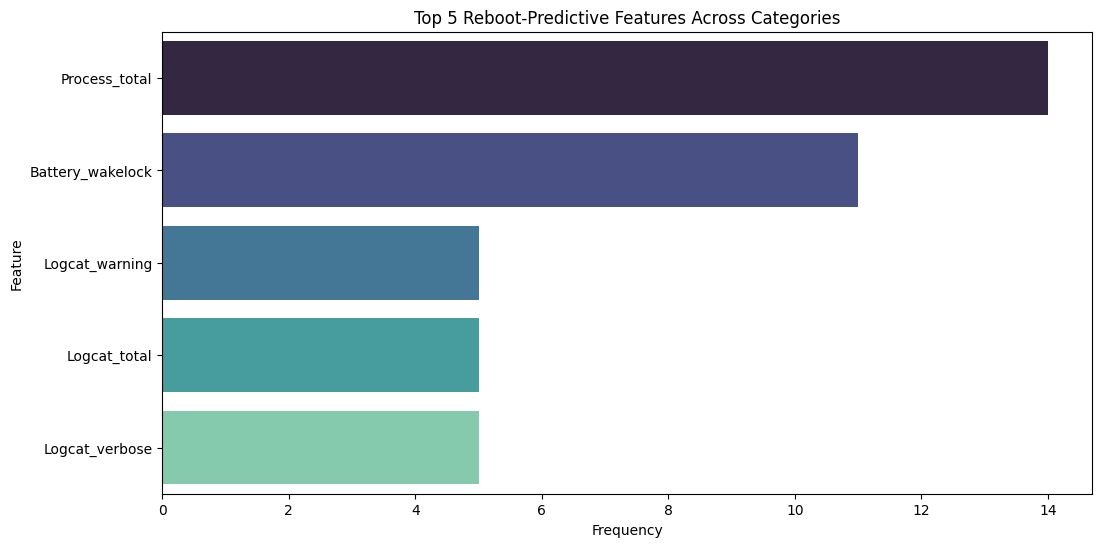

In [9]:
# Finding most important features, by sweeping all catogories

def feature_importance_by_category(
    model,
    df,
    feature_cols,
    label_col='BinaryReboot',
    category_col='Category',
    frac_train=0.8,
    n_top=5,
    random_state=42
):
    """
    For each malware category:
      1. Take frac_train of that category's rows as positive train.
      2. Sample an equal number of rows from all other categories as negative train.
      3. Fit `model` to predict label_col.
      4. Extract the top-n_top `feature_importances_` from the fitted model.
    Returns a DataFrame of (Category, Feature, Importance).
    """
    results = []
    for cat in df[category_col].unique():
        # Our positive-class subset (this category)
        pos = df[df[category_col] == cat]
        train_pos = pos.sample(frac=frac_train, random_state=random_state)
        # Our negative pool = All other rows, equal sizes
        neg_pool = df[df[category_col] != cat]
        train_neg = neg_pool.sample(n=len(train_pos), random_state=random_state)

        train = pd.concat([train_pos, train_neg], ignore_index=True)

        X_train = train[feature_cols]
        y_train = train[label_col]

        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)

        model.fit(X_train_scaled, y_train)

        # Taking top-5 importances
        imp = model.feature_importances_
        top_idxs = np.argsort(imp)[-n_top:]
        for idx in top_idxs:
            results.append({
                'Category':   cat,
                'Feature':    feature_cols[idx],
                'Importance': imp[idx]
            })

    return pd.DataFrame(results)


drop_cols = ['Category','Reboot','Hash','Family','BinaryReboot']
numeric_df = df.drop(columns=drop_cols, errors='ignore').select_dtypes(include=np.number)
feature_cols = numeric_df.columns.tolist()

# I choose best binary classifier XGBoost for feature importance
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Running the per-category feature importance sweep
fi_df = feature_importance_by_category(
    model=xgb,
    df=df,
    feature_cols=feature_cols,
    label_col='BinaryReboot',
    category_col='Category',
    frac_train=0.8,
    n_top=5,
    random_state=42
)

# Finding which features appear most often
freq = fi_df['Feature'].value_counts().reset_index()
freq.columns = ['Feature','Frequency']
print(freq.head(10))

# Plotting top 5 features by frequency
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Feature', data=freq.head(5), palette='mako')
plt.title('Top 5 Reboot-Predictive Features Across Categories')
plt.show()

In [11]:
#Top 5 important features of each android malware subtype

top5_dict = fi_df.groupby('Category') \
    .apply(lambda d: d.sort_values('Importance').tail(5)['Feature'].tolist()) \
    .to_dict()
top5_dict

{'Adware': ['Logcat_warning',
  'Logcat_info',
  'Logcat_verbose',
  'Battery_wakelock',
  'Process_total'],
 'Backdoor': ['API_Database_android.content.ContextWrapper_databaseList',
  'Logcat_total',
  'API_SystemManager_android.app.ApplicationPackageManager_setComponentEnabledSetting',
  'Battery_wakelock',
  'Process_total'],
 'FileInfector': ['Memory_SharedDirty',
  'Memory_PssClean',
  'API_Database_android.database.sqlite.SQLiteDatabase_getPath',
  'Battery_wakelock',
  'Process_total'],
 'No_Category': ['Logcat_error',
  'Logcat_info',
  'Battery_wakelock',
  'Memory_PrivateClean',
  'Process_total'],
 'PUA': ['Logcat_error',
  'Logcat_total',
  'Battery_wakelock',
  'API_DeviceInfo_android.telephony.TelephonyManager_getDeviceId',
  'Process_total'],
 'Ransomware': ['Logcat_error',
  'Logcat_warning',
  'Logcat_verbose',
  'API_SystemManager_android.content.BroadcastReceiver_abortBroadcast',
  'Process_total'],
 'Riskware': ['Logcat_warning',
  'API_Database_android.content.Cont

In [45]:
def test_category_generalization(df, category, selected_features):
    # Splitting out the category’s 80/20
    df_cat   = df[df['Category']==category].sample(frac=1, random_state=42)
    n_train  = int(len(df_cat)*0.8)
    df_train = df_cat.iloc[:n_train]
    df_rest  = df_cat.iloc[n_train:]
    df_other = df[df['Category']!=category]
    # test on (held-out 20% of this cat) + (all other categories)
    df_test  = pd.concat([df_rest, df_other], ignore_index=True)

    X_tr = df_train[selected_features]
    y_tr = df_train['BinaryReboot']
    X_te = df_test [selected_features]
    y_te = df_test ['BinaryReboot']

    # Scaling
    scaler   = MinMaxScaler()
    X_tr_s   = scaler.fit_transform(X_tr)
    X_te_s   = scaler.transform(X_te)

    # Training on XGBoost
    clf = XGBClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=6,
        use_label_encoder=False, eval_metric='logloss',
        random_state=42, n_jobs=-1
    )
    clf.fit(X_tr_s, y_tr)

    # Predict & report
    y_pred = clf.predict(X_te_s)
    print(f"\n=== {category} generalization ===")
    print(classification_report(y_te, y_pred, target_names=['Before','After']))

    cm = confusion_matrix(y_te, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Before','After'], yticklabels=['Before','After'])
    plt.title(f"{category} Confusion Matrix")
    plt.show()

    # Accuracy by each category
    df_test['Pred'] = y_pred
    acc_by_cat = df_test.groupby('Category') \
                       .apply(lambda d: (d['Pred']==d['BinaryReboot']).mean())
    plt.figure(figsize=(8,3))
    acc_by_cat.plot.bar()
    plt.title(f"{category}-trained Model Accuracy by Category")
    plt.ylabel("Accuracy")
    plt.show()

    # Accuracy by Reboot state
    acc_by_rb = df_test.groupby('Reboot') \
                   .apply(lambda d: (d['Pred']==d['BinaryReboot']).mean())
    acc_by_rb = acc_by_rb.reindex(['Before','After'])
    
    fig, ax = plt.subplots(figsize=(4,6))
    acc_by_rb.plot.bar(color=['C0','C1'], ax=ax)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.02, 
            f"{p.get_height():.1%}", 
            ha='center', 
            va='bottom',
            fontsize=12
        )

    
    ax.set_title(f"{category}-trained Model Accuracy by Reboot", pad=15)
    ax.set_ylabel("Accuracy")
    ax.set_xticklabels(acc_by_rb.index, rotation=0)
    plt.show()

    return float(acc_by_rb['Before']), float(acc_by_rb['After'])


→ Adware

=== Adware generalization ===
              precision    recall  f1-score   support

      Before       0.90      0.93      0.92     23729
       After       0.92      0.89      0.90     20926

    accuracy                           0.91     44655
   macro avg       0.91      0.91      0.91     44655
weighted avg       0.91      0.91      0.91     44655



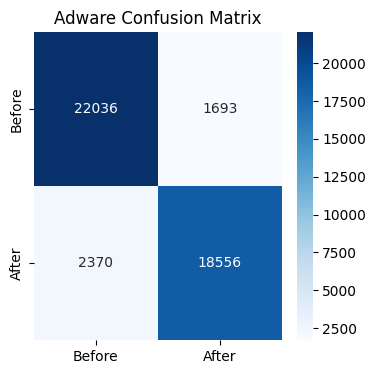

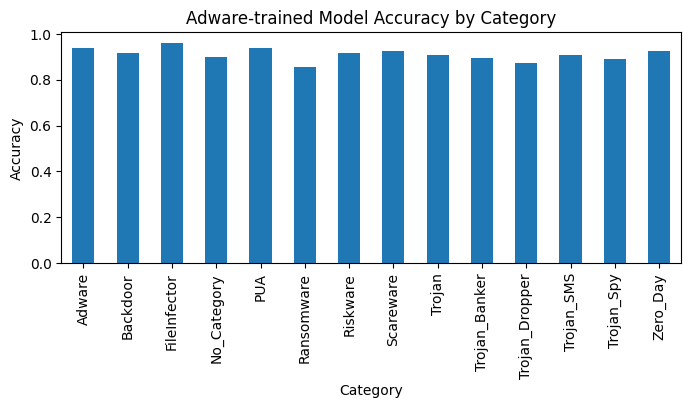

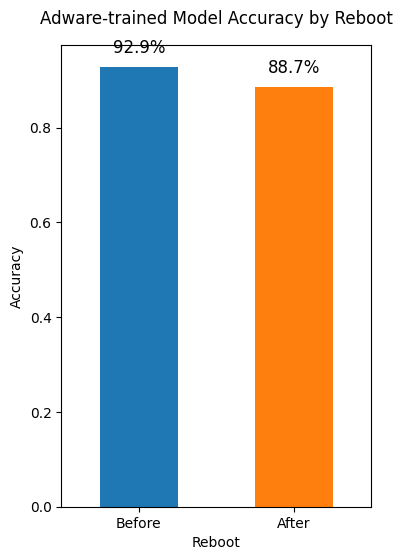


→ Backdoor

=== Backdoor generalization ===
              precision    recall  f1-score   support

      Before       0.86      0.82      0.84     27917
       After       0.80      0.85      0.83     24613

    accuracy                           0.83     52530
   macro avg       0.83      0.83      0.83     52530
weighted avg       0.83      0.83      0.83     52530



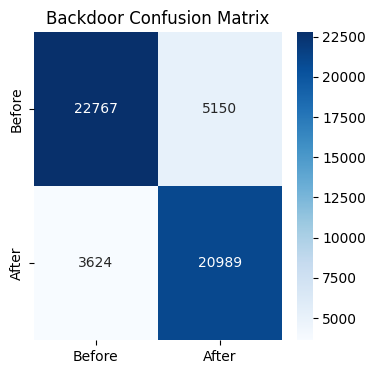

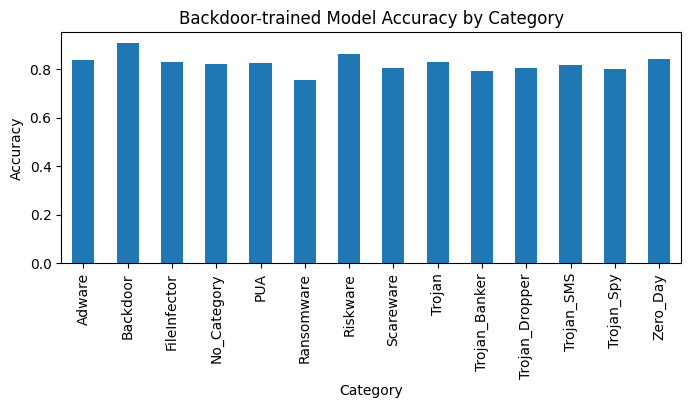

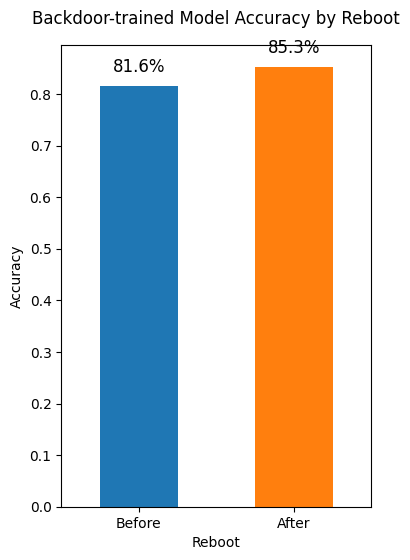


→ FileInfector

=== FileInfector generalization ===
              precision    recall  f1-score   support

      Before       0.80      0.76      0.78     28278
       After       0.74      0.78      0.76     24963

    accuracy                           0.77     53241
   macro avg       0.77      0.77      0.77     53241
weighted avg       0.77      0.77      0.77     53241



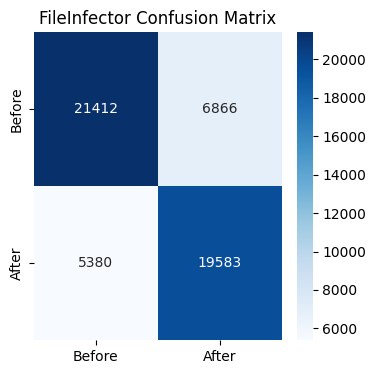

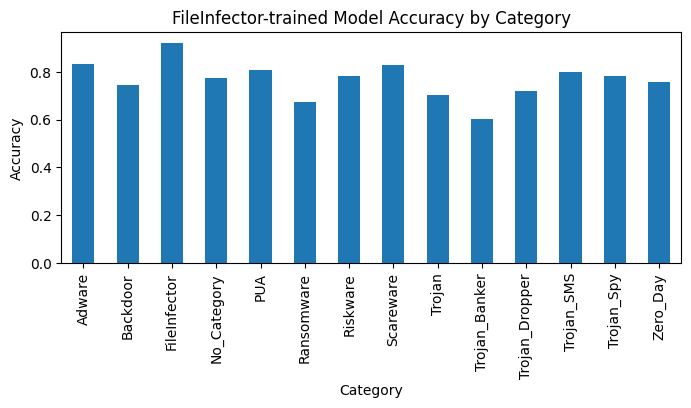

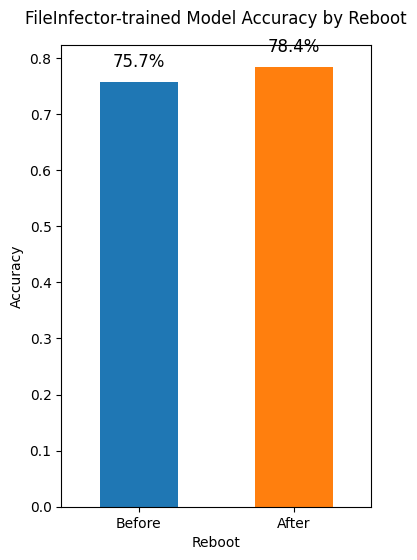


→ No_Category

=== No_Category generalization ===
              precision    recall  f1-score   support

      Before       0.86      0.92      0.89     27553
       After       0.90      0.84      0.87     24341

    accuracy                           0.88     51894
   macro avg       0.88      0.88      0.88     51894
weighted avg       0.88      0.88      0.88     51894



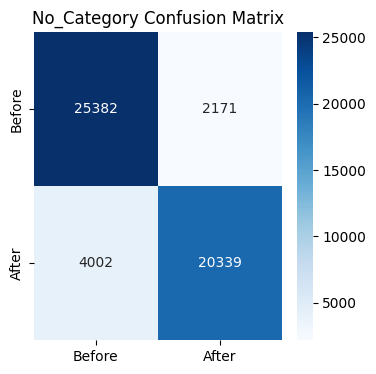

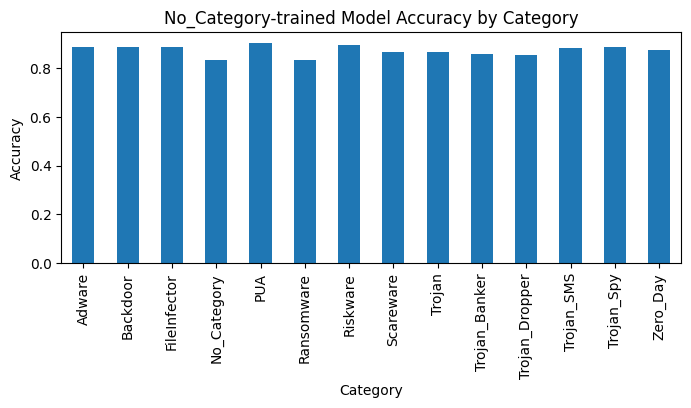

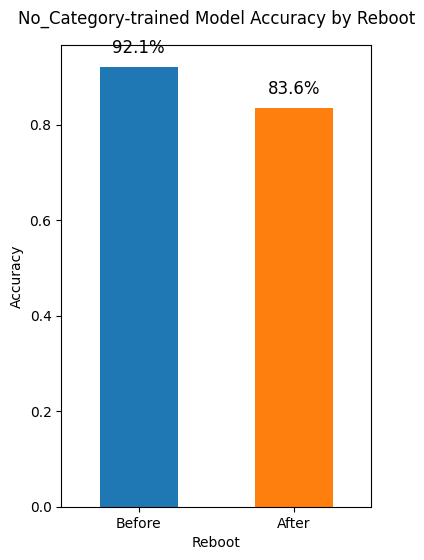


→ PUA

=== PUA generalization ===
              precision    recall  f1-score   support

      Before       0.87      0.87      0.87     27859
       After       0.85      0.85      0.85     24548

    accuracy                           0.86     52407
   macro avg       0.86      0.86      0.86     52407
weighted avg       0.86      0.86      0.86     52407



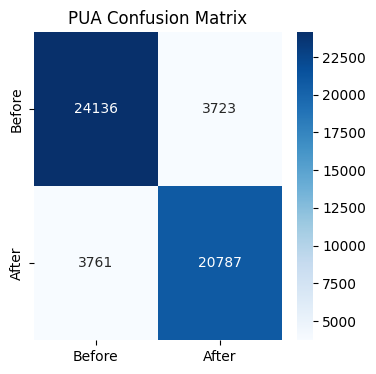

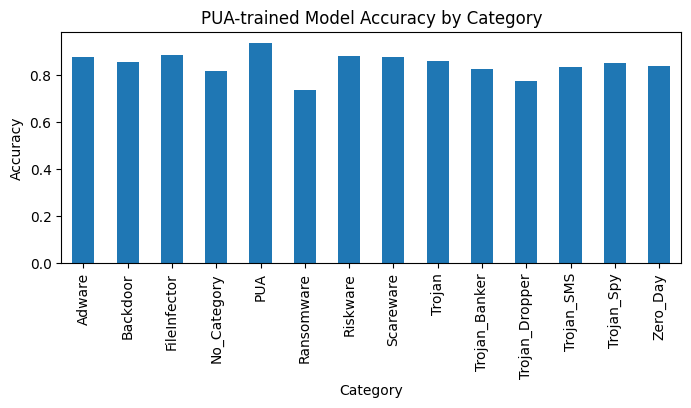

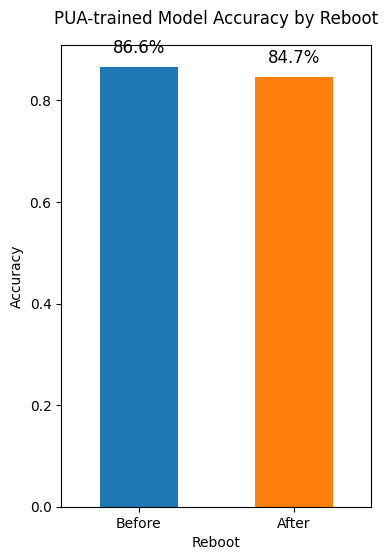


→ Ransomware

=== Ransomware generalization ===
              precision    recall  f1-score   support

      Before       0.91      0.88      0.89     26896
       After       0.87      0.90      0.89     23815

    accuracy                           0.89     50711
   macro avg       0.89      0.89      0.89     50711
weighted avg       0.89      0.89      0.89     50711



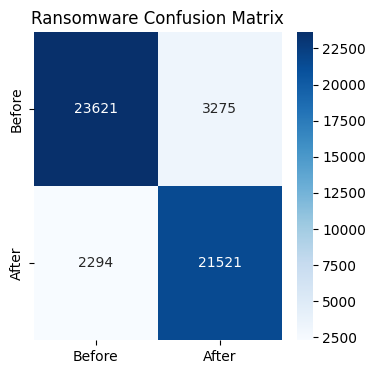

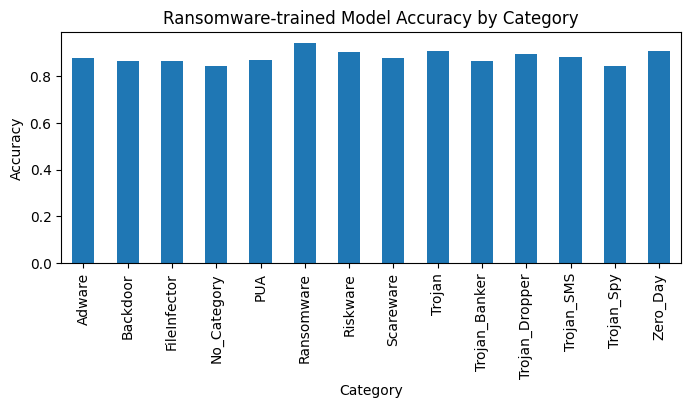

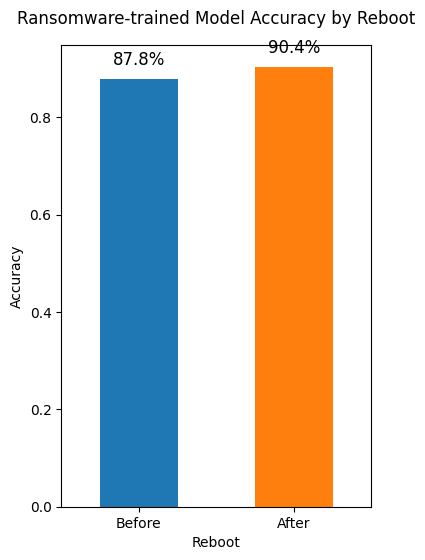


→ Riskware

=== Riskware generalization ===
              precision    recall  f1-score   support

      Before       0.90      0.77      0.83     22604
       After       0.78      0.90      0.83     19593

    accuracy                           0.83     42197
   macro avg       0.84      0.84      0.83     42197
weighted avg       0.84      0.83      0.83     42197



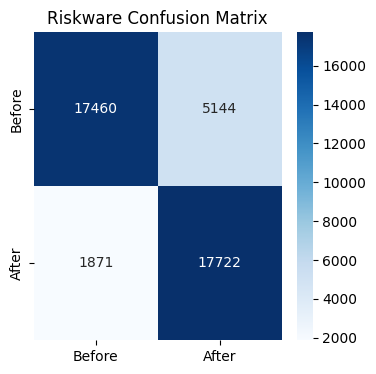

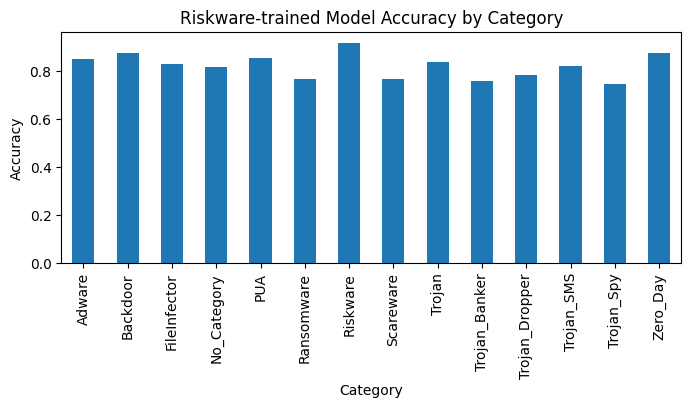

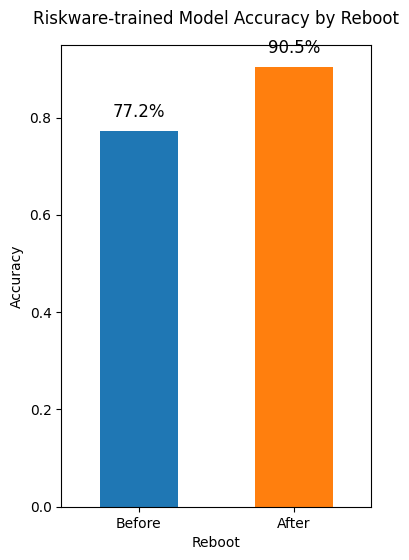


→ Scareware

=== Scareware generalization ===
              precision    recall  f1-score   support

      Before       0.76      0.91      0.83     28013
       After       0.87      0.68      0.76     24718

    accuracy                           0.80     52731
   macro avg       0.82      0.79      0.80     52731
weighted avg       0.81      0.80      0.80     52731



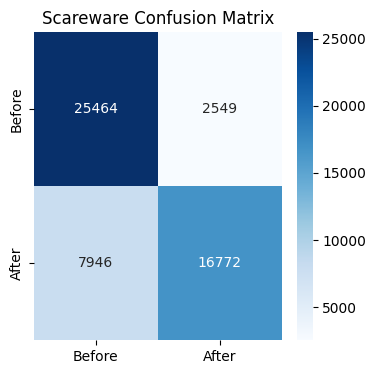

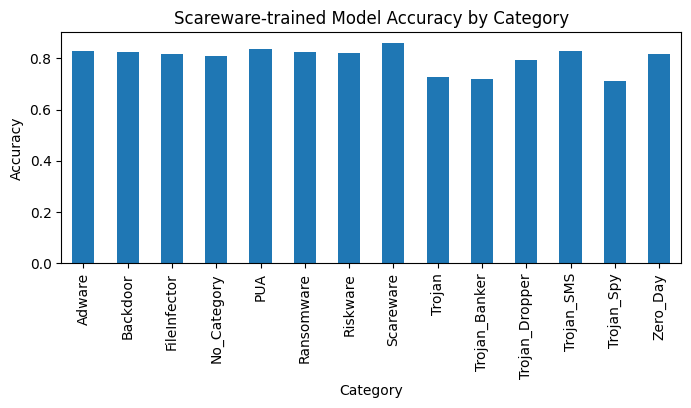

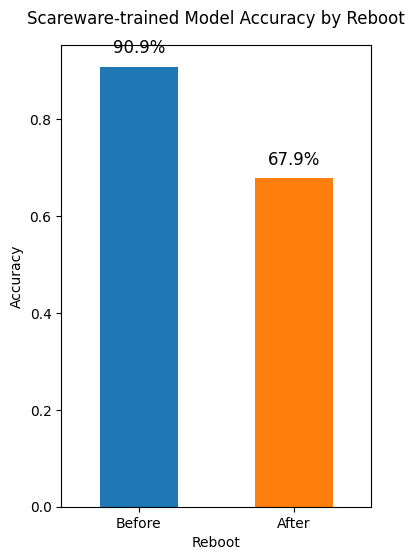


→ Trojan

=== Trojan generalization ===
              precision    recall  f1-score   support

      Before       0.93      0.93      0.93     24861
       After       0.93      0.92      0.92     21829

    accuracy                           0.93     46690
   macro avg       0.93      0.93      0.93     46690
weighted avg       0.93      0.93      0.93     46690



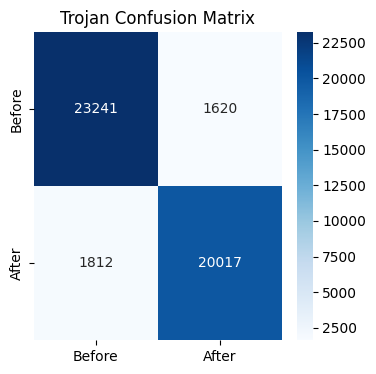

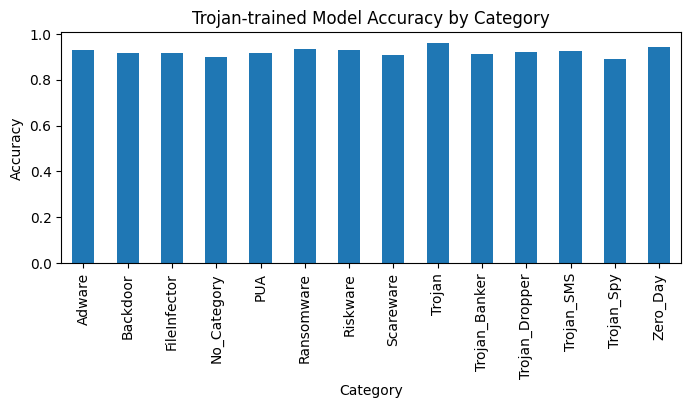

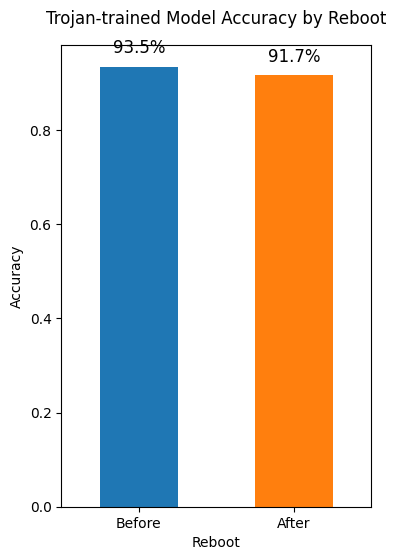


→ Trojan_Banker

=== Trojan_Banker generalization ===
              precision    recall  f1-score   support

      Before       0.83      0.86      0.84     28287
       After       0.83      0.80      0.81     24960

    accuracy                           0.83     53247
   macro avg       0.83      0.83      0.83     53247
weighted avg       0.83      0.83      0.83     53247



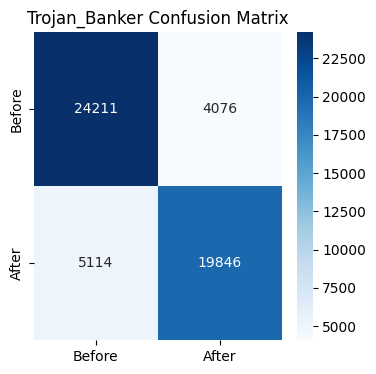

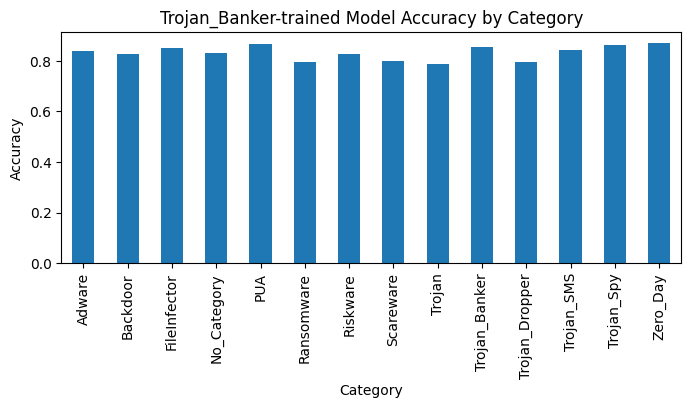

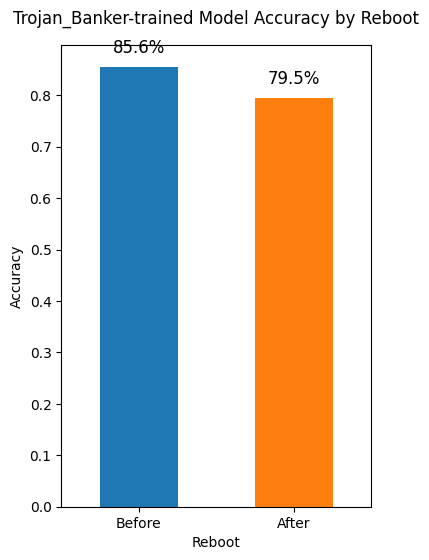


→ Trojan_Dropper

=== Trojan_Dropper generalization ===
              precision    recall  f1-score   support

      Before       0.89      0.95      0.92     27722
       After       0.94      0.87      0.90     24461

    accuracy                           0.91     52183
   macro avg       0.91      0.91      0.91     52183
weighted avg       0.91      0.91      0.91     52183



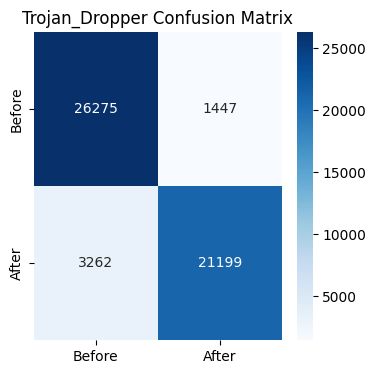

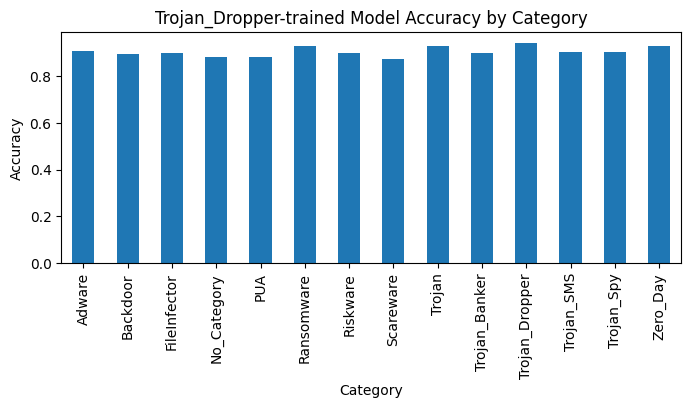

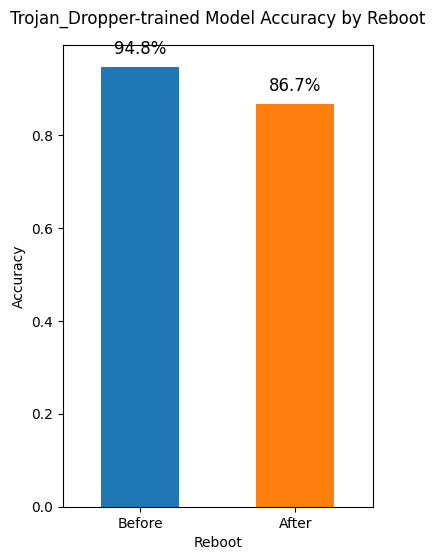


→ Trojan_SMS

=== Trojan_SMS generalization ===
              precision    recall  f1-score   support

      Before       0.82      0.92      0.87     27571
       After       0.89      0.77      0.83     24317

    accuracy                           0.85     51888
   macro avg       0.86      0.85      0.85     51888
weighted avg       0.86      0.85      0.85     51888



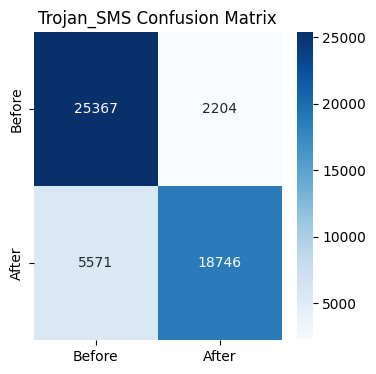

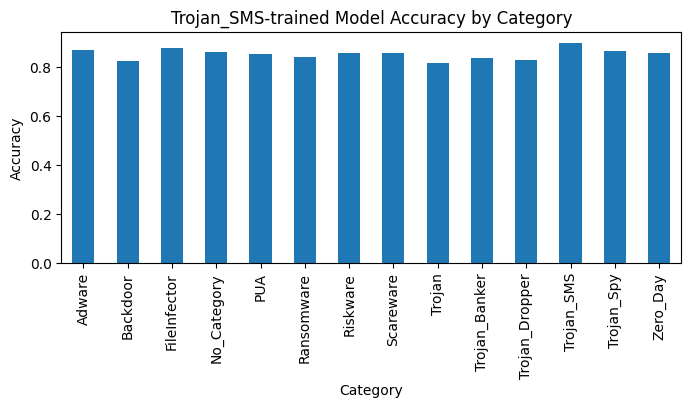

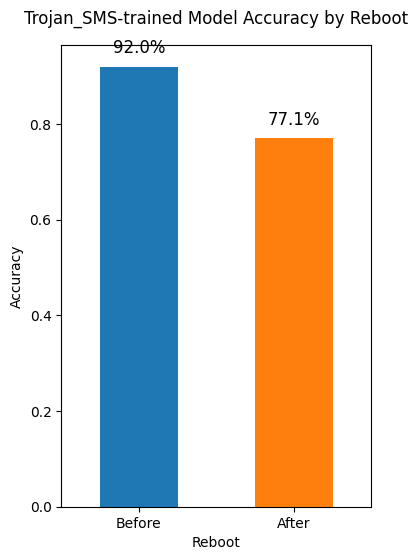


→ Trojan_Spy

=== Trojan_Spy generalization ===
              precision    recall  f1-score   support

      Before       0.83      0.86      0.84     26947
       After       0.84      0.80      0.82     24220

    accuracy                           0.83     51167
   macro avg       0.83      0.83      0.83     51167
weighted avg       0.83      0.83      0.83     51167



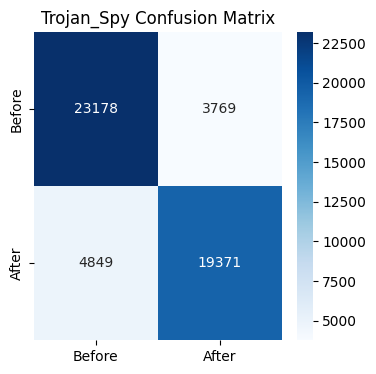

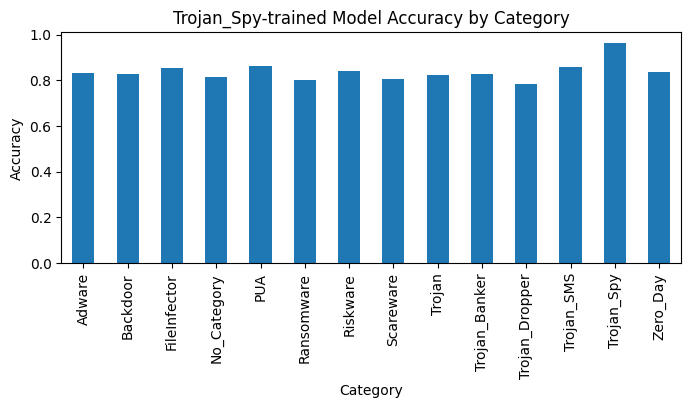

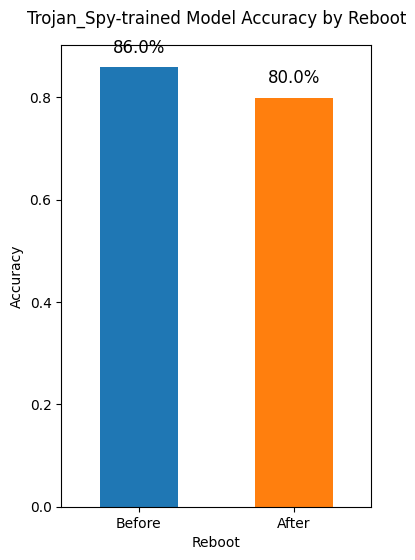


→ Zero_Day

=== Zero_Day generalization ===
              precision    recall  f1-score   support

      Before       0.91      0.92      0.91     26519
       After       0.90      0.89      0.90     23340

    accuracy                           0.91     49859
   macro avg       0.91      0.91      0.91     49859
weighted avg       0.91      0.91      0.91     49859



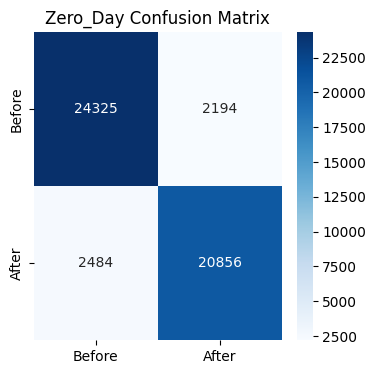

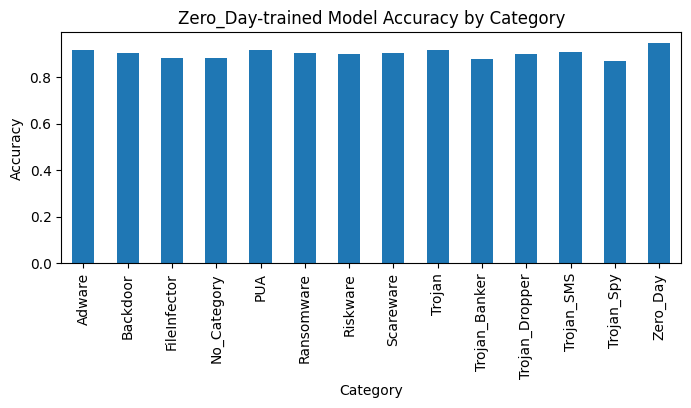

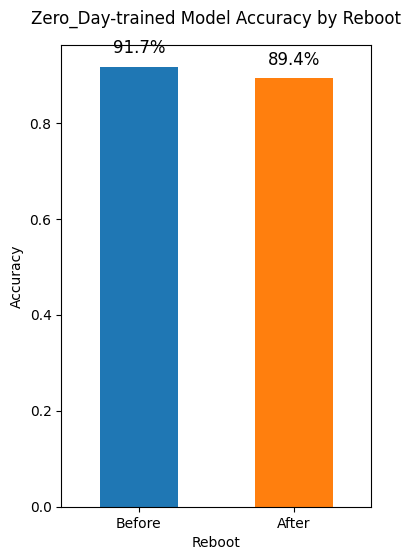


Zero-Shot Reboot Accuracy by Category:

                  Before     After
Malware                           
Adware          0.928653  0.886744
Backdoor        0.815525  0.852761
FileInfector    0.757196  0.784481
No_Category     0.921206  0.835586
PUA             0.866363  0.846790
Ransomware      0.878235  0.903674
Riskware        0.772430  0.904507
Scareware       0.909007  0.678534
Trojan          0.934838  0.916991
Trojan_Banker   0.855906  0.795112
Trojan_Dropper  0.947803  0.866645
Trojan_SMS      0.920061  0.770901
Trojan_Spy      0.860133  0.799794
Zero_Day        0.917267  0.893573


In [47]:
# Training, testing and visualizing results
rows = []
for cat, feats in top5_dict.items():
    print(f"\n→ {cat}")
    before_acc, after_acc = test_category_generalization(df, cat, feats)
    rows.append({
        'Malware': cat,
        'Before':  before_acc,
        'After':   after_acc
    })

summary = pd.DataFrame(rows).set_index('Malware')
print("\nZero-Shot Reboot Accuracy by Category:\n")
print(summary)

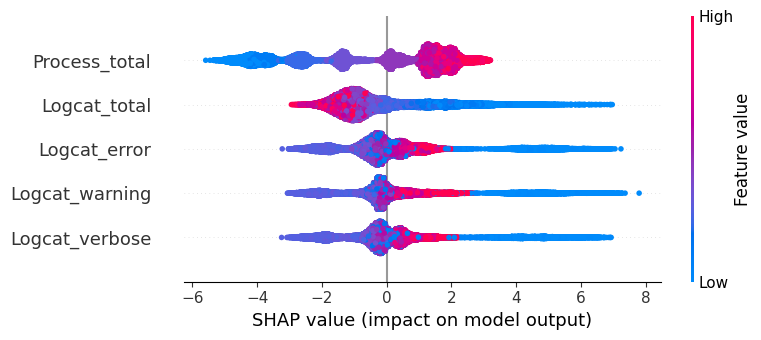

In [53]:
# Shap Analysis of top 5 features of Trojan based on xGBoost
import shap
from shap import plots

trojan_feats = top5_dict['Trojan']

# Building the same 80/20 split + “all other” test split again
df_cat   = df[df['Category']=='Trojan'].sample(frac=1, random_state=42)
n_train  = int(len(df_cat)*0.8)
df_train = df_cat.iloc[:n_train]
df_rest  = df_cat.iloc[n_train:]
df_other = df[df['Category']!='Trojan']
df_test  = pd.concat([df_rest, df_other], ignore_index=True)

X_train = df_train[trojan_feats]
y_train = df_train['BinaryReboot']
X_test  = df_test [trojan_feats]
y_test  = df_test ['BinaryReboot']

scaler    = MinMaxScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train_s, y_train)

# Explaining with SHAP
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test_s, check_additivity=False)

shap.summary_plot(
    shap_values.values, # shape (n_samples, n_features)
    X_test,
    feature_names=trojan_feats,
    plot_type="dot",
    show=True
)

